In [3]:
# importo la libreria da me creata per l'autenticazione su kaggle
# uso la funzione start_kaggle() per autenticarmi su kaggle
from autenticazione.autenticazione import start_kaggle
start_kaggle()

In [4]:
# Visualizzare la lista dei dataset
import kaggle

key_search = "vehicle"

datasets = kaggle.api.datasets_list(search=key_search)

In [5]:
# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'
for dataset in datasets:
    print(dataset['ref'])

nehalbirla/vehicle-dataset-from-cardekho
dataturks/vehicle-number-plate-detection
brsdincer/vehicle-detection-image-set
debajyotipodder/co2-emission-by-vehicles
shivamb/vehicle-claim-fraud-detection
geoffnel/evs-one-electric-vehicle-dataset
lasaljaywardena/vehicle-images-dataset
mathurinache/invehicle-coupon-recommendation
lasaljaywardena/sri-lanka-vehicle-prices-dataset
tsiaras/uk-road-safety-accidents-and-vehicles
vishnu0399/emergency-vehicle-siren-sounds
mamtadhaker/lt-vehicle-loan-default-prediction
new-york-city/nypd-motor-vehicle-collisions
epa/fuel-economy
utkarshx27/electric-vehicle-population-data
utkarshx27/motor-vehicle-collisions
nypd/vehicle-collisions
anmolkumar/health-insurance-cross-sell-prediction
michaelbryantds/electric-vehicle-charging-dataset
kkhandekar/stolen-vehicle-dataset


In [6]:
# scelgo il dataset che mi interessa e lo scarico
# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# scelgo il dataset che mi interessa
dt_scelto = 'debajyotipodder/co2-emission-by-vehicles'

# scarico il dataset
kaggle.api.dataset_download_files(dt_scelto, path=path, unzip=True)

In [7]:
# creo il dataframe
import pandas as pd
df = pd.read_csv(path + '/CO2 Emissions_Canada.csv')

In [8]:
# analisi preliminare del dataset
# visualizzo le prime 5 righe del dataset
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


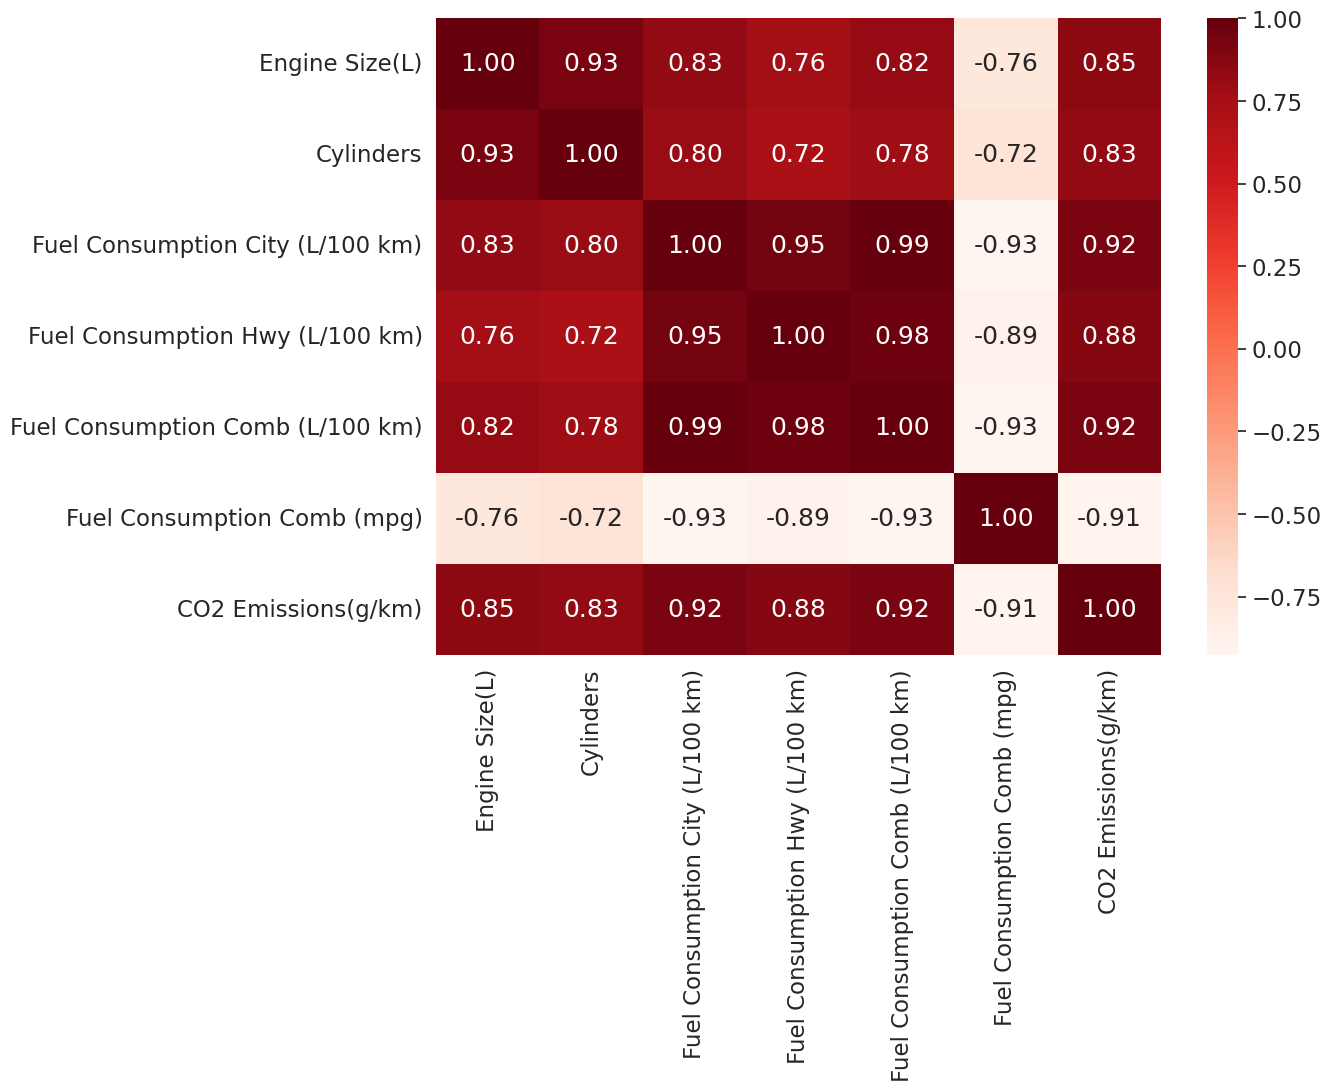

In [9]:
# valutiamo le correlazioni tra le variabili
# importo la libreria per la visualizzazione dei grafici
import seaborn as sns
import matplotlib.pyplot as plt

# imposto la dimensione dei grafici
sns.set(rc={'figure.figsize':(11.7,8.27)})
# imposto il font
sns.set(font_scale=1.5)

# creo la matrice di correlazione
corr = df.corr()

# creo il grafico
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Reds')
plt.show()

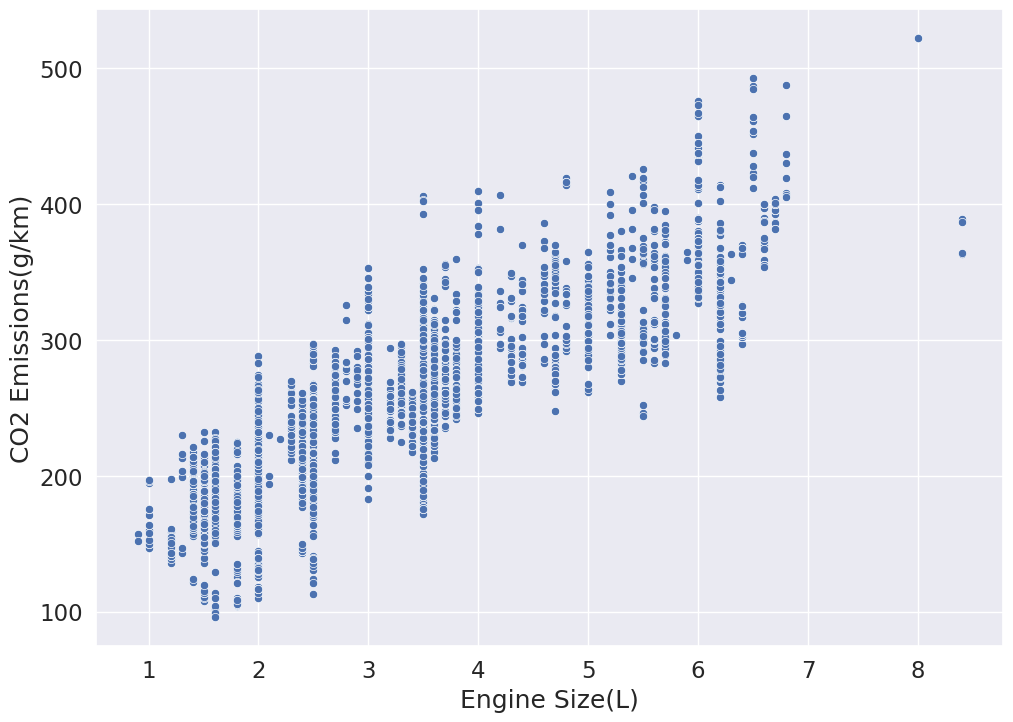

In [10]:
# visualiziamo un grafico di dispersione tra le variabili 'Engine Size(L)' e 'CO2 Emissions(g/km)'
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df)
plt.show()

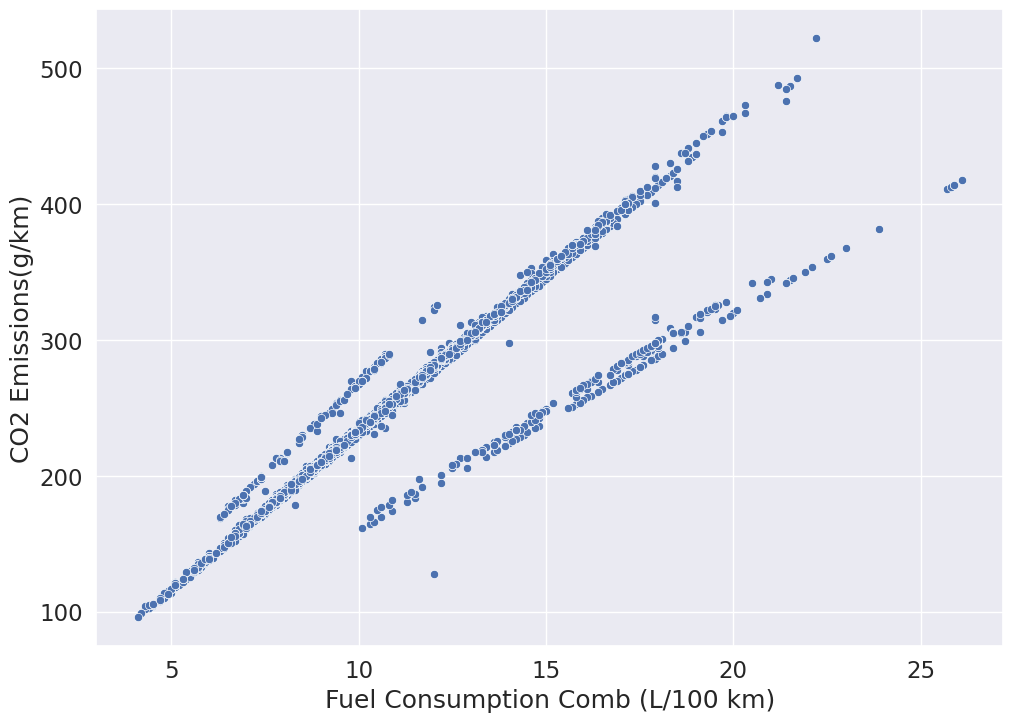

In [11]:
# visualizziamo un grafico di dispersione tra le variabili 'Fuel Consumption Comb (L/100 km)' e 'CO2 Emissions(g/km)'
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data=df)
plt.show()

In [12]:
# realizziamo un modello di regressione lineare semplice tra le variabili 'Engine Size(L)', 'Cilindri' e 'CO2 Emissions(g/km)'
# importo la libreria per la regressione lineare
from sklearn.linear_model import LinearRegression

# creo il modello
model = LinearRegression()

# imposto le variabili indipendenti e dipendente
X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y = df['CO2 Emissions(g/km)']

# divido il dataset in training e test set
from sklearn.model_selection import train_test_split

# imposto la dimensione del test set al 20% del dataset
test_size = 0.2

# imposto il seed per la riproducibilità
random_state = 42

# divido il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# addestro il modello
model.fit(X_train, y_train)

# valuto il modello
# importo le librerie per la valutazione del modello
from sklearn.metrics import mean_squared_error, r2_score

# predico i valori del test set
y_pred = model.predict(X_test)

# valuto il modello
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# visualizzo i coefficienti del modello
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)


Mean squared error: 421.92
Coefficient of determination: 0.88
Coefficients: 
 [ 5.59471283  6.38079806 13.27032994]
Intercept: 
 51.52997801495357


In [13]:
# provo ad applicare una PCA per ridurre le dimensioni del dataset
# importo la libreria per la PCA
from sklearn.decomposition import PCA

# imposto il numero di componenti
n_components = 2

# creo l'oggetto PCA
pca = PCA(n_components=n_components)

# addestro la PCA sul training set
pca.fit(X_train)

# trasformo il training set
X_train_pca = pca.transform(X_train)

# trasformo il test set
X_test_pca = pca.transform(X_test)

# creo il modello
model_pca = LinearRegression()

# addestro il modello
model_pca.fit(X_train_pca, y_train)

# predico i valori del test set
y_pred_pca = model_pca.predict(X_test_pca)

# valuto il modello
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_pca))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_pca))

# visualizzo i coefficienti del modello
print('Coefficients: \n', model_pca.coef_)
print('Intercept: \n', model_pca.intercept_)


Mean squared error: 421.85
Coefficient of determination: 0.88
Coefficients: 
 [15.70608331  1.08324761]
Intercept: 
 250.93957345971563


In [14]:
# proviamo a rivalutare il modello scalando le variabili
# importo la libreria per lo scaling
from sklearn.preprocessing import StandardScaler

# creo l'oggetto StandardScaler
scaler = StandardScaler()

# addestro lo scaler sul training set
scaler.fit(X_train)

# trasformo il training set
X_train_scaled = scaler.transform(X_train)

# trasformo il test set
X_test_scaled = scaler.transform(X_test)

# creo il modello
model_scaled = LinearRegression()

# addestro il modello
model_scaled.fit(X_train_scaled, y_train)

# predico i valori del test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

# valuto il modello
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_scaled))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_scaled))

# visualizzo i coefficienti del modello
print('Coefficients: \n', model_scaled.coef_)
print('Intercept: \n', model_scaled.intercept_)



Mean squared error: 421.92
Coefficient of determination: 0.88
Coefficients: 
 [ 7.60502667 11.70272471 38.3303208 ]
Intercept: 
 250.93957345971563


CERCHIAMO DI MIGLIORARE IL MODELLO DANDO VALORI NUMERICI ALLE VARIABILI CATEGORICHE

In [15]:
df = pd.read_csv(path + '/CO2 Emissions_Canada.csv')

In [16]:
# elenco delle variabili categoriche
df.select_dtypes(include=['object']).columns

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

ANALIZZIAMO LA VARIABILE TRASMISSION

In [17]:
df.Transmission.value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

trasmissione

 - A = Automatico
 - AM = manuale automatico
 - AS = automatico con selezione delle marce
 - AV = Variabile continuamente

dove ci sono le ruote viene poi seguito dal numero di ruote

In [18]:
# per la varibaile 'Transmission' provo a creare un modello di traduzione in valori numerici
# importo la libreria per la codifica delle variabili categoriche
from sklearn.preprocessing import LabelEncoder
import re

# creo due colonne una per la codifica della variabile 'Transmission' dove ci sara ancora un valore categorico
# e una dove ci sara il numero di ruote
df["gears"] = df["Transmission"].copy()
df["gears"] = df["gears"].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else 0)

# trasfomiamo i valori stringa in valori numerici
df["gears"] = pd.to_numeric(df["gears"])

df["Transmission"] = df["Transmission"].apply(lambda x: re.findall("[A-Za-z]+", str(x))[0] if re.findall("[A-Za-z]+", str(x)) else None)


In [19]:
df.gears.value_counts()

6     3259
8     1802
7     1026
9      419
5      307
0      295
10     210
4       67
Name: gears, dtype: int64

In [20]:
# mappiamo le variabili categoriche
# importo la libreria per il mappaggio delle variabili categoriche
from sklearn.preprocessing import LabelEncoder

# creo l'oggetto LabelEncoder
le = LabelEncoder()

# mappo la variabile 'Transmission'
df['Transmission'] = le.fit_transform(df['Transmission'])

# mappo la variabile 'Fuel Type'
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])



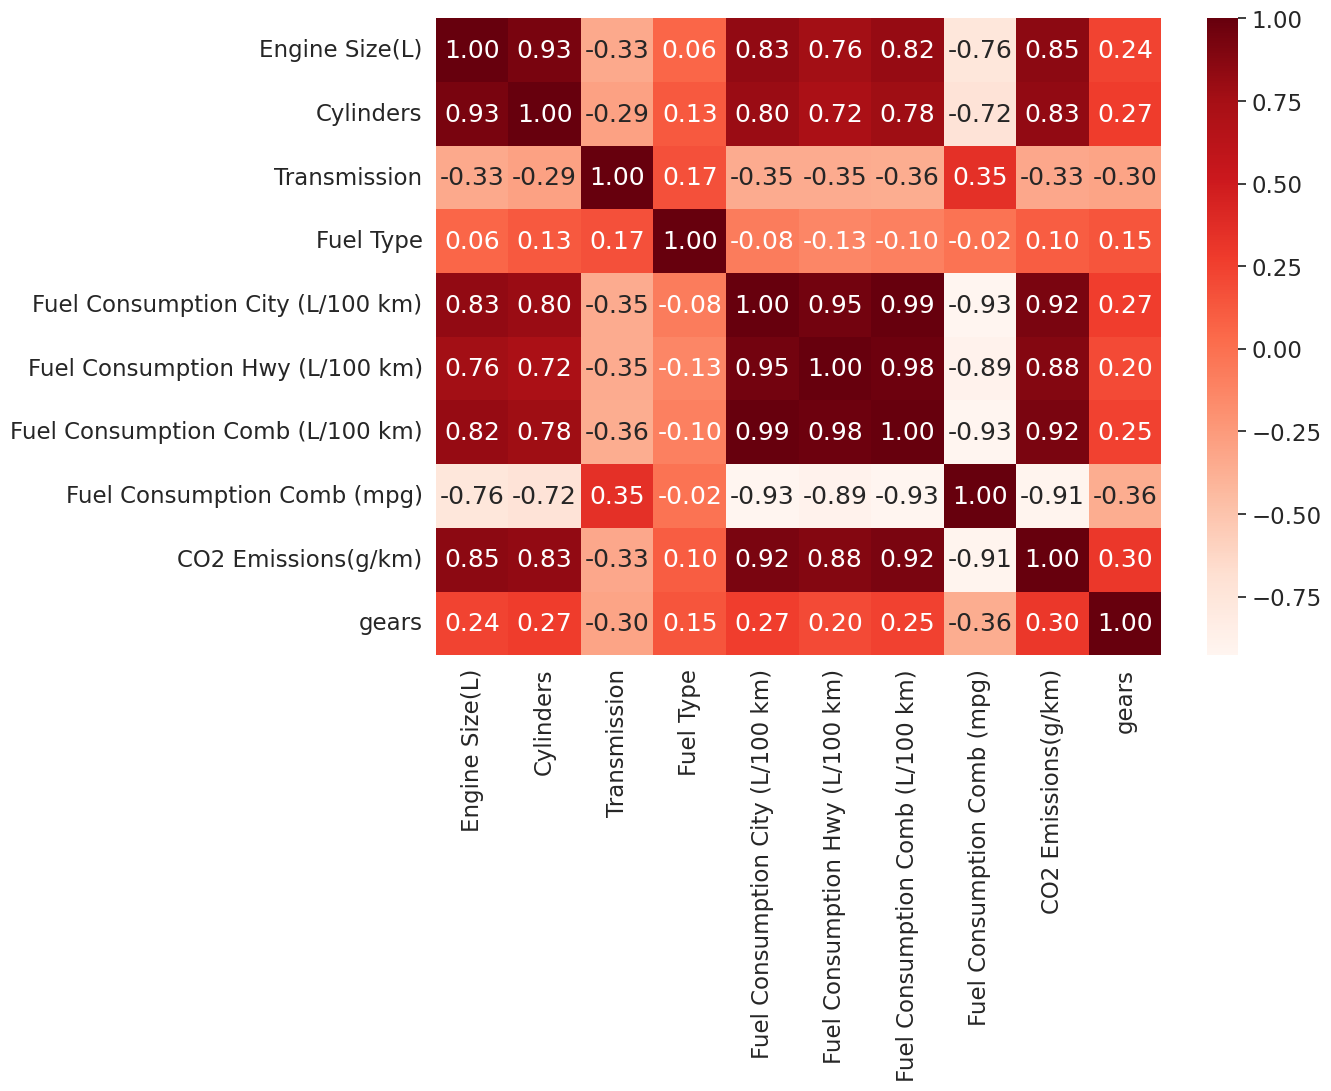

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# creo la matrice di correlazione
corr = df.corr()

# creo il grafico
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Reds')
plt.show()

In [22]:
# impostiamo le nuove variabili indipendenti e dipendente
# le variabili indipendenti saranno tutte quelle numeriche escloso il l'emissione di co2
variabili = df.select_dtypes(include=['object']).columns.tolist()
variabili.append('Model')
variabili.append('CO2 Emissions(g/km)')

print(variabili)

X = df.drop(variabili, axis=1)
y = df['CO2 Emissions(g/km)']

from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# predico i valori del test set
y_pred = model.predict(X_test)

# valuto il modello
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# visualizzo i coefficienti del modello
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

['Make', 'Model', 'Vehicle Class', 'Model', 'CO2 Emissions(g/km)']
Mean squared error: 310.23
Coefficient of determination: 0.91
Coefficients: 
 [ 5.54207156  5.29131424 -0.172191    7.45232204 -0.50909419  3.92915768
  5.32635402 -2.76326422 -0.06665047]
Intercept: 
 168.17249117448222
